Since these problems are variations of Problem 2 from Hogg & Foreman-Mackey, I'll include my code for that problem here as well.

# Initial Sampler

In [2]:
import numpy as np
import matplotlib.pyplot as pl

In [8]:
rng = np.random.default_rng(3617)

In [177]:
def gauss(x, u, s):
    return np.exp(-(x-u)**2/2/s**2) / s / np.sqrt(2*np.pi)

def log_gauss(x, u, s):
    return -0.5 * (x-u)**2 / s**2 - 0.5*np.log(2*np.pi*s**2)


def sample(n, like, prop, init, rng, **kwargs): 
    
    xlist = np.empty(int(n))
    lik0 = like(init, *kwargs['like_args'])
    x0 = init
    i = 0
    while i < n_steps:

        xprop = x0 + rng.normal(*kwargs['prop_args'])
        r = np.log(rng.random())
        lik1 = like(xprop, *kwargs['like_args'])

        if lik1-lik0 > r:
            x0 = xprop
            lik0 = lik1

        xlist[i] = x0
        i+=1

    return xlist

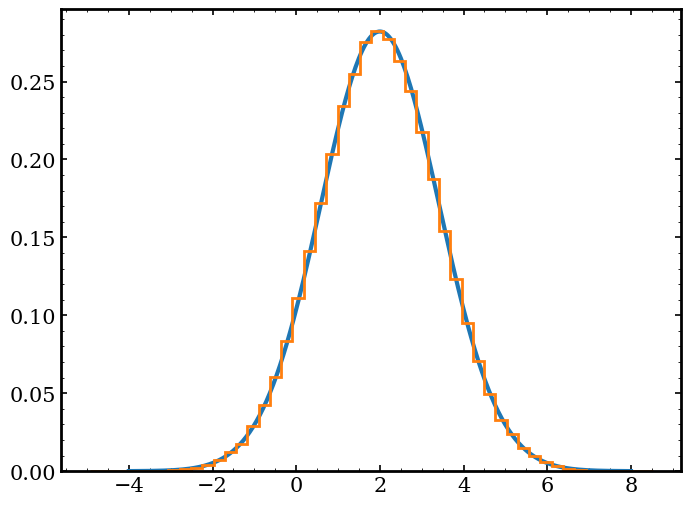

In [194]:
n_steps = 1e6
mu = 2
sig = np.sqrt(2)
prop_sig = 1
prop_mu = 0

chain = sample(n_steps, log_gauss, rng.normal, 0, rng, like_args=[mu, sig], prop_args=[prop_mu,prop_sig])

xs = np.linspace(-4, 8, 300)
ys = gauss(xs, mu, sig)


pl.figure(figsize=(8,6))
pl.plot(xs, ys)
pl.hist(chain[1000:], bins=50, histtype="step", density=True, lw=2)
pl.show()

# Problem 1 (Hogg Problem 9)

In [175]:
def logsample(n, like, prop, init, rng, **kwargs): 

    xlist = np.empty(int(n))
    lik0 = like(init, *kwargs['like_args'])
    x0 = init
    i = 0
    while i < n_steps:

        xprop = x0 + rng.normal(*kwargs['prop_args'])
        r = np.log(rng.random())
        lik1 = like(xprop, *kwargs['like_args'])

        if lik1-lik0 > r:
            x0 = xprop
            lik0 = lik1

        xlist[i] = np.exp(x0)
        i+=1

    return xlist

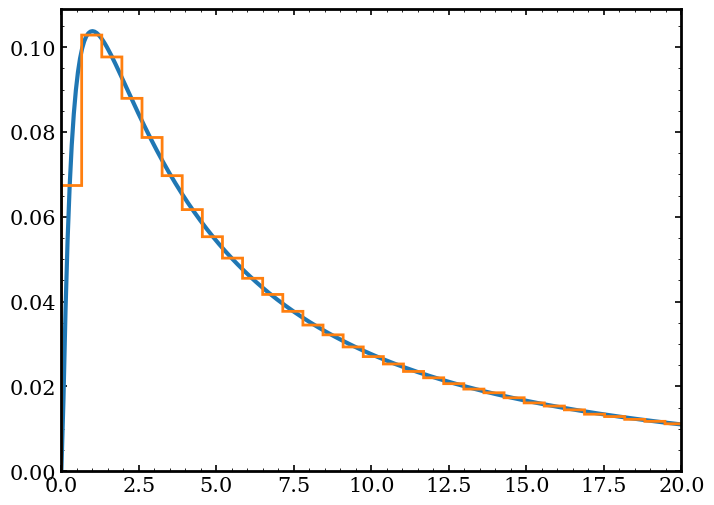

In [176]:
n_steps = 2e6
mu = 2
sig = np.sqrt(2)
prop_sig = 1
prop_mu = 0

logchain = logsample(n_steps, log_gauss, rng.normal, 1, rng, like_args=[mu, sig], prop_args=[prop_mu,prop_sig])

xs = np.linspace(1e-10, 20, 300)
ys = gauss(np.log(xs), mu, sig)/xs


pl.figure(figsize=(8,6))
pl.plot(xs, ys)
pl.hist(logchain, bins=7000, histtype="step", density=True, lw=2)
pl.xlim(0,20)
pl.show()

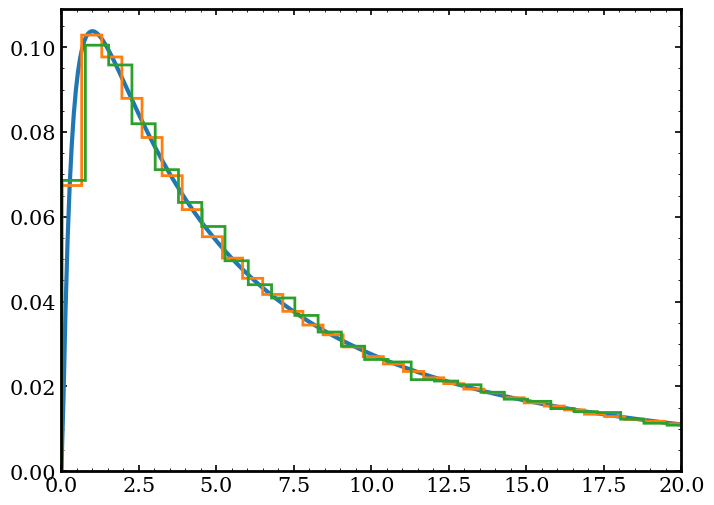

In [193]:
xs = np.linspace(1e-10, 20, 300)
ys = gauss(np.log(xs), mu, sig)/xs


pl.figure(figsize=(8,6))
pl.plot(xs, ys)
pl.hist(logchain, bins=7000, histtype="step", density=True, lw=2)
pl.hist(np.exp(chain), bins=7000, histtype="step", density=True, lw=2)
pl.xlim(0,20)
pl.show()

# Problem 2 (Hogg Problem 10)

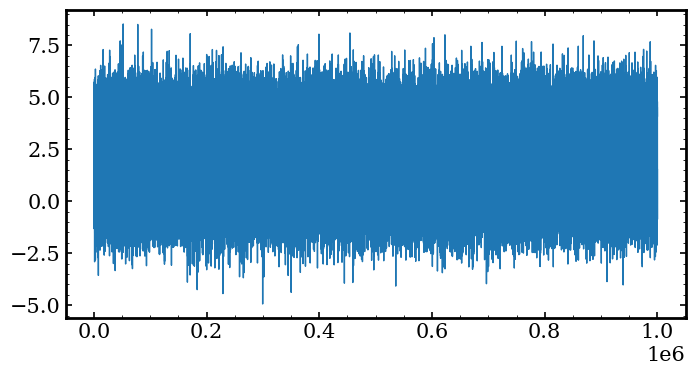

Mean: 1.9828924535482353, std: 1.4143884127665678


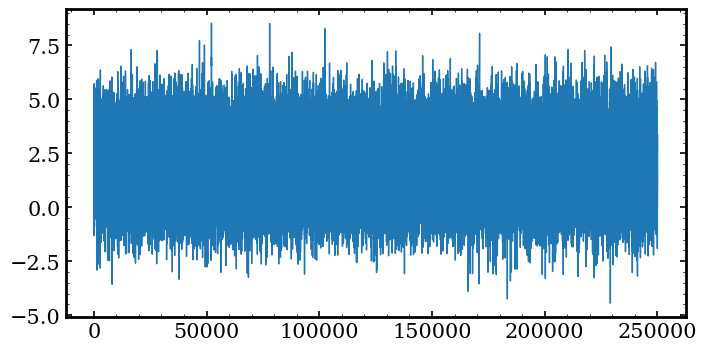

Mean: 1.9918802634359751, std: 1.4145171111568573


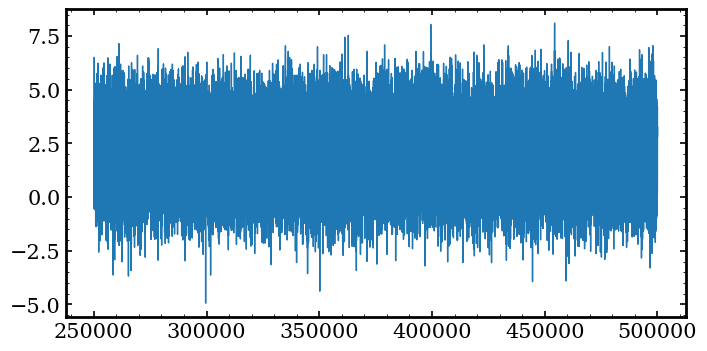

Mean: 1.9817821983741788, std: 1.4192166492659715


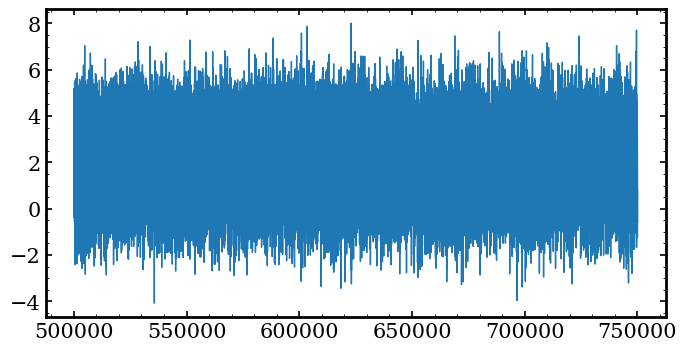

Mean: 2.012585066623158, std: 1.4110872961394996


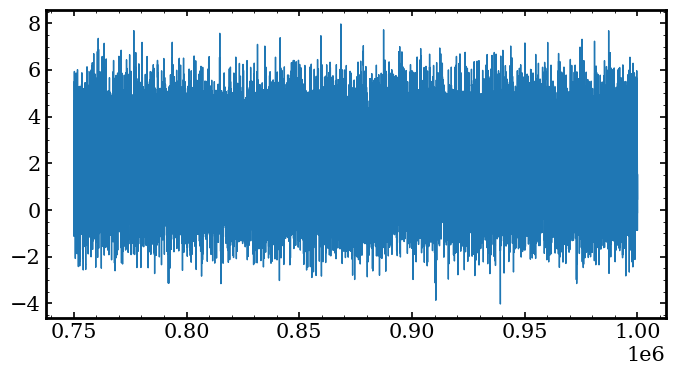

In [214]:
step = np.arange(1,len(chain)+1)

seg = np.arange(len(chain)/4, dtype=int)
#seg2 = np.arange(len(chain)/4, len(chain)/2)
#seg2 = np.arange(len(chain)/2, 3*len(chain)/4)
#seg4 = np.arange(3*len(chain)/4, len(chain))


pl.figure(figsize=(8,4))
pl.plot(step, chain, lw=1)
pl.show()

for i in range(4):
    print(f'Mean: {np.mean(chain[seg])}, std: {np.std(chain[seg])}')
    pl.figure(figsize=(8,4))
    pl.plot(step[seg], chain[seg], lw=1)
    pl.show()
    seg += int(len(chain)//4)


Mean: 2.3802074941283546, std: 1.337812012067947


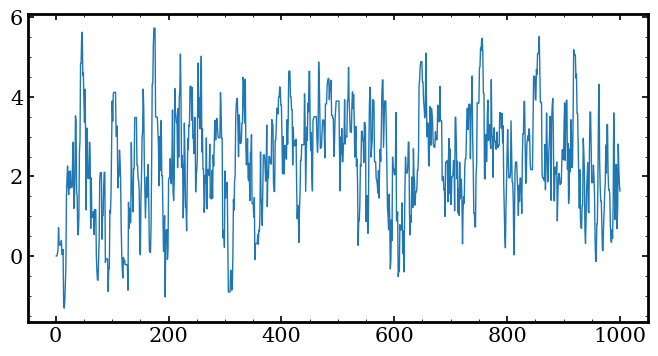

In [215]:
print(f'Mean: {np.mean(chain[:1000])}, std: {np.std(chain[:1000])}')
pl.figure(figsize=(8,4))
pl.plot(step[:1000], chain[:1000], lw=1)
pl.show()

In [222]:
f = np.fft.fft(chain)
fc = np.conjugate(f)
fac = f*fc
ac = np.fft.ifft(fac).real

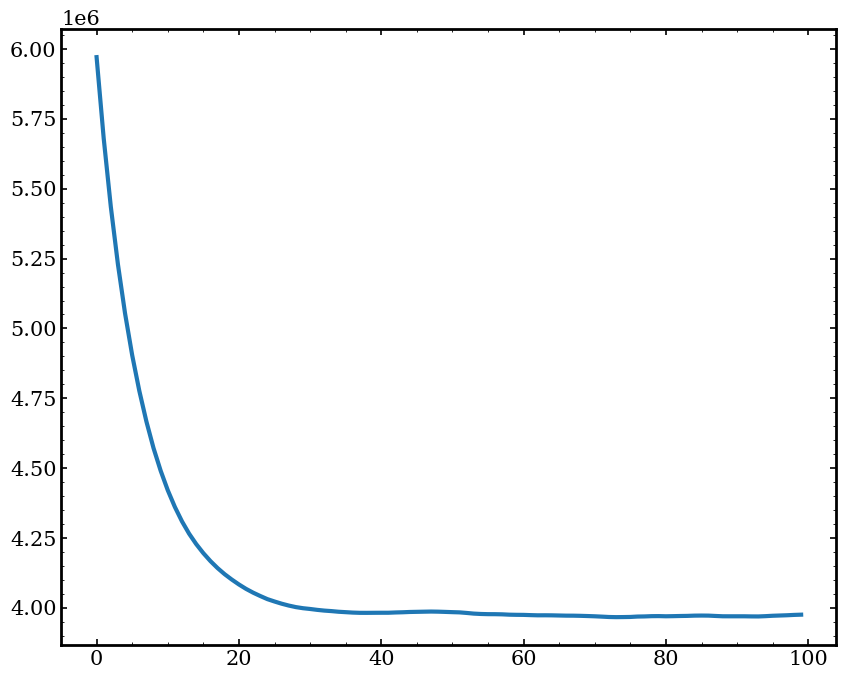

In [240]:
pl.plot(np.arange(100), ac[:100])
pl.show()

In [221]:
ac.real

array([5971026.32329888, 5680199.07341945, 5435550.53450534, ...,
       5229256.2376262 , 5435550.53450534, 5680199.07341945])

In [227]:
ac1 = np.correlate(chain, chain, "full")

In [230]:
ac1.shape

(1999999,)

In [233]:
from scipy.signal import correlate

In [238]:
ac2 = correlate(chain, chain)

In [245]:
lags = signal.correlation_lags(chain.size, chain.size, mode="full")

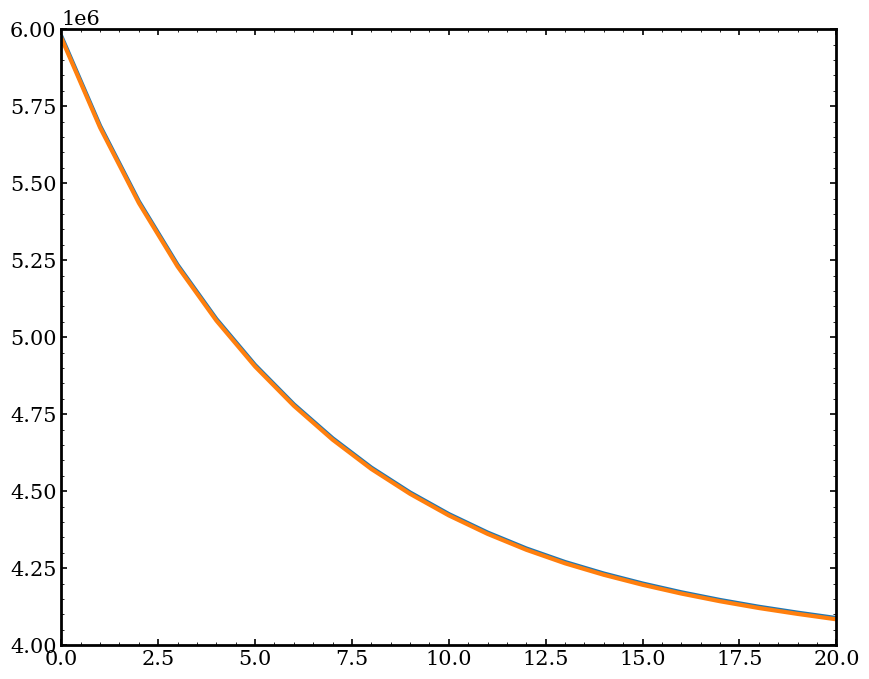

In [252]:
pl.plot(lags,ac2*1.001)
pl.xlim(0,20)
pl.ylim(4e6,6e6)
pl.plot(np.arange(100), ac[:100])
pl.show()